# Project 3: More Classication

## Part 1: Acquire and Partition Data (5 points)

In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt

# Set to 1 to standardize, 0 to not standardize
STD = 1

In [2]:
# Getting the Data via Python
data   = np.loadtxt('sonar5841.dat')
# Shuffle the data
np.random.shuffle(data)
data_x = data[:,0:-1]
data_y = data[:,-1]
print('shape of data_x:',data_x.shape)
print('shape of data_y',data_y.shape)

shape of data_x: (208, 60)
shape of data_y (208,)


In [3]:
# X data represent the energy over 60 bands ranging from 0 to 1
# Y data represent the classes, either rock or metal detected
#
# There are 111 metal and 97 rock
# http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)

# Partitioning the Data
test_data_x = data_x[0:41]
test_data_y = data_y[0:41]

train_data_x = data_x[41:-1]
train_data_y = data_y[41:-1]

# Standardizing
train_x_mean = np.mean(train_data_x)
train_x_std  = np.std(train_data_x)
train_x_mean, train_x_std

if STD:
    train_data_x = (train_data_x - train_x_mean)/train_x_std
    test_data_x = (test_data_x - train_x_mean)/train_x_std

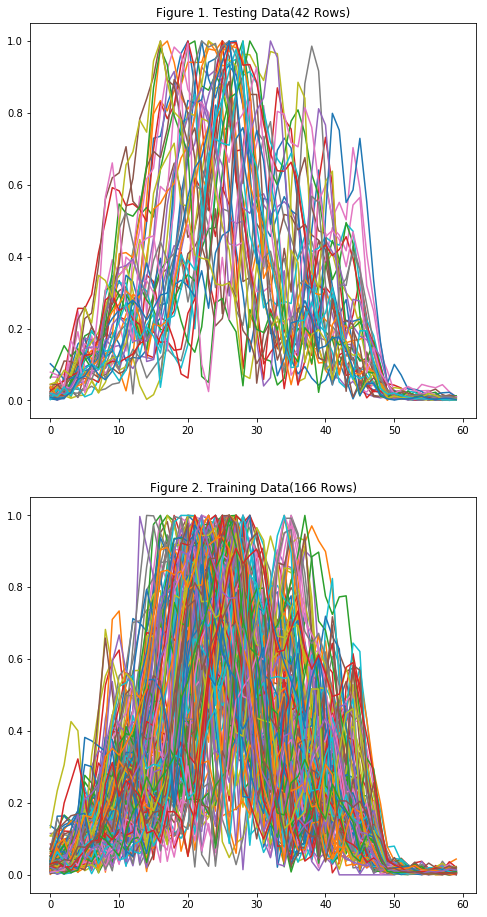

In [4]:
# Plotting
f1 = plt.figure(1, figsize=(8,16))
f1.clf()
test_data_plot  = f1.add_subplot(211)
test_data_plot.set_title("Figure 1. Testing Data(42 Rows)")
train_data_plot = f1.add_subplot(212)
train_data_plot.set_title("Figure 2. Training Data(166 Rows)")

for i in test_data_x:
    test_data_plot.plot(i)
for i in train_data_x:
    train_data_plot.plot(i)

In [5]:
def IRLS(data):
    length        = len(data)
    not_converged = True
    w             = np.array([0, 0, 0])
    p             = np.empty(length)
    s             = np.empty(length)
    z             = np.empty(length)

    ones          = np.ones(200)
    ones[100:]    = ones[100:]*-1
    
    temp_var      = np.hstack((ones[None].T,data))
    np.random.shuffle(temp_var)
    
    y             = temp_var[:,0]
    data          = temp_var[:,1:]
    
    while not_converged:
        w_prev = w
        for i in range(length):
            p[i] = np.exp(w_prev.dot(data[i])) / (1 + np.exp(w_prev.dot(data[i])))
            s[i] = p[i]*(1-p[i])
            
            if math.isnan(s[i]): s[i]=1
            
            z[i] = w_prev.dot(data[i]) + (y[i]-p[i])/(max(s[i],0.00001))
            
        diag_s = np.diag(s)
        t1     = np.linalg.inv(np.dot(np.dot(data.T, diag_s), data))
        t2     = np.dot(np.dot(data.T, diag_s), z)
        w      = np.dot(t1, t2)
        w      = w/np.linalg.norm(w)
        
        print('Iterations',w)
        
        if abs(sum(w-w_prev)) < 0.000001:
            
            print("Converged!!")
            not_converged = False
            return w
            
        elif sum(abs(w)) > 900 or math.isnan(w[0]):
            
            print("Not converging!!!")
            return w
            
    return w

In [7]:
IRLS(train_data_x.T[0])

ValueError: all the input arrays must have same number of dimensions